In [2]:
import pandas as pd

# Initialize lists to store information
timestamps = []
packet_sizes = []
delays = []
sent_packets = {}  # Dictionary to track sent packets by packet ID

with open("out_demo101.tr", "r") as file:
    for line in file:
        fields = line.split()
        
        # Only process lines with sufficient fields and matching "cbr" protocol
        if len(fields) > 4 and fields[4] == "cbr":
            event_type = fields[0]
            timestamp = float(fields[1])
            packet_size = int(fields[5])
            packet_id = fields[10]  # Assuming packet ID is in this position
            
            if event_type == '+':  # Send event
                sent_packets[packet_id] = timestamp  # Store send timestamp by packet ID
            
            elif event_type == 'r':  # Receive event
                if packet_id in sent_packets:
                    send_time = sent_packets.pop(packet_id)  # Get and remove the send time
                    delay = timestamp - send_time  # Calculate delay
                    timestamps.append(timestamp)  # Append receive timestamp
                    packet_sizes.append(packet_size)  # Append packet size
                    delays.append(delay)  # Append calculated delay

# Create DataFrame from the collected data
data = pd.DataFrame({
    "Timestamp": timestamps,
    "PacketSize": packet_sizes,
    "Delay": delays
})

print(data)


      Timestamp  PacketSize     Delay
0      0.114000        1000  0.014000
1      0.122000        1000  0.014000
2      0.130000        1000  0.014000
3      0.138000        1000  0.014000
4      0.138706        1000  0.024706
...         ...         ...       ...
1087   4.506000        1000  0.014000
1088   4.506706        1000  0.024706
1089   4.514706        1000  0.024706
1090   4.522706        1000  0.024706
1091   4.530706        1000  0.024706

[1092 rows x 3 columns]


In [20]:
# Tính thông lượng mỗi giây (Kbps)
data['Throughput'] = data['PacketSize'] * 8 / 1000  # đổi sang kilobits
throughput_per_second = data.groupby(data['Timestamp'].astype(int))['Throughput'].sum()
print(throughput_per_second)


Timestamp
0    1752.0
1    1920.0
2    2000.0
3    1984.0
4    1080.0
Name: Throughput, dtype: float64


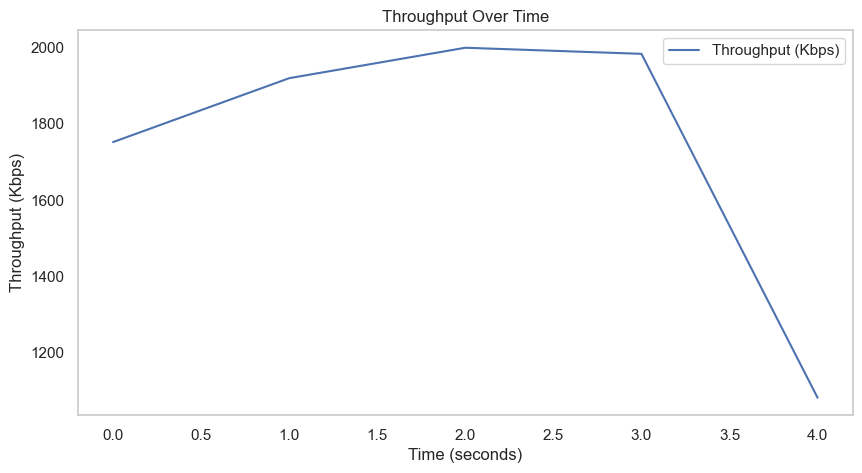

In [21]:
import matplotlib.pyplot as plt

# Vẽ đồ thị thông lượng
plt.figure(figsize=(10, 5))
plt.plot(throughput_per_second.index, throughput_per_second.values, label="Throughput (Kbps)", color='b')
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (Kbps)")
plt.title("Throughput Over Time")
plt.legend()
plt.grid()
plt.show()


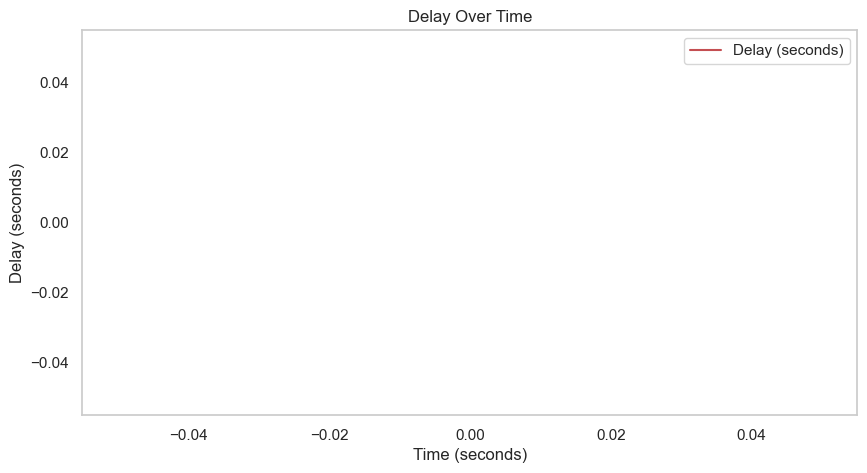

In [11]:
# Vẽ đồ thị độ trễ
plt.figure(figsize=(10, 5))
plt.plot(data['Timestamp'], data['Delay'], label="Delay (seconds)", color='r')
plt.xlabel("Time (seconds)")
plt.ylabel("Delay (seconds)")
plt.title("Delay Over Time")
plt.legend()
plt.grid()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


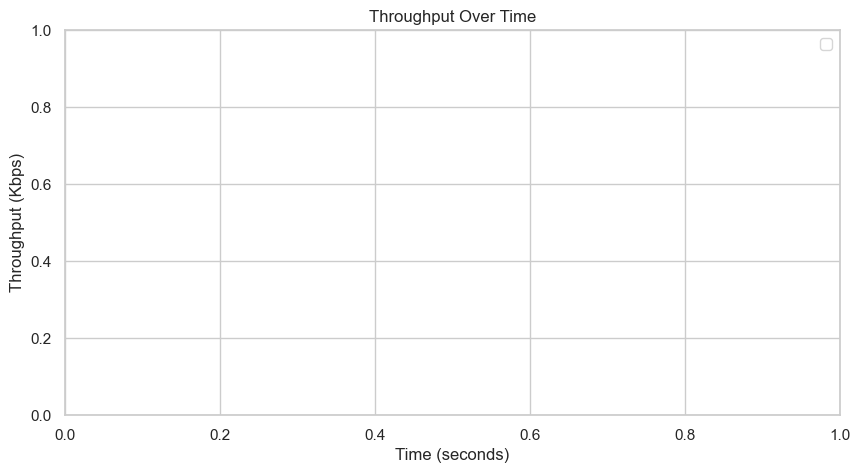

In [7]:
import seaborn as sns

# Tùy chỉnh kiểu biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Vẽ thông lượng
sns.lineplot(x=throughput_per_second.index, y=throughput_per_second.values, label="Throughput (Kbps)")
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (Kbps)")
plt.title("Throughput Over Time")
plt.legend()
plt.show()


In [ ]:
plt.savefig("throughput_plot.png", dpi=300)
plt.savefig("throughput_plot.eps", format="eps", dpi=300)
